<a href="https://colab.research.google.com/github/kazimayaan/Machine-Learning-Lab/blob/main/BayesPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [17]:
def Bayes(data,x,col,yescount,nocount):
  xyes = 0
  xno = 0
  for line in data:
    if line[col]==x:
      if line[-1]=='yes':
        xyes+=1
      else:
        xno+=1
  pxyes = xyes/yescount
  pxno = xno/nocount
  return pxyes,pxno

,color,type,origin,stolen
0,red,sports,domestic,yes
1,red,sports,imported,no
2,yellow,suv,imported,yes
3,red,sports,domestic,yes
4,red,sports,imported,no
5,yellow,suv,imported,yes
6,yellow,suv,imported,yes
7,yellow,sports,imported,no


5
3
Please enter your car color,type and origin:
red sports imported
*
19.35483870967742 80.64516129032259
*


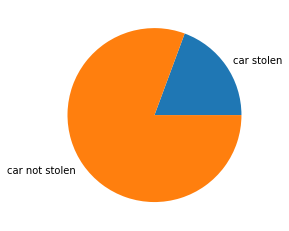

In [25]:
temp = pd.read_csv("/content/car (2).csv")
file = "/content/car (2).csv"
display(temp)
DATA = []
fd = csv.reader(open(file))
for line in fd:
  DATA.append(line)
# print(DATA)
data = DATA[1:]
n = len(data)
yescount = 0
nocount = 0
for line in data:
  if line[-1]=='yes':
    yescount+=1
  else:
    nocount+=1

print(yescount)
print(nocount)

pyes = yescount/n
pno = nocount/n

print("Please enter your car color,type and origin:")
x,y,z = input().split()

pxyes,pxno = Bayes(data,x,0,yescount,nocount)
pyyes,pyno = Bayes(data,y,1,yescount,nocount)
pzyes,pzno = Bayes(data,z,2,yescount,nocount)

resyes = pyes*pxyes*pyyes*pzyes
resno = pno*pxno*pyno*pzno

peryes = (resyes/(resyes+resno))*100
perno = (resno/(resyes+resno))*100

print("*")
print(peryes,perno)
print("*")

percentages = [peryes,perno]
label= ['car stolen','car not stolen']
plt.pie(percentages,labels=label)
plt.show()